In [1]:
import pandas as pd
import numpy as np
import os
files = [
    "2016_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
    "2017_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
    "2018_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv",
         ]
local_path = os.getcwd()
first = True
for file in files:
    print(os.path.join(local_path, 'Testdateien', 'LG', file))
    if first:
        df = pd.read_csv(
            os.path.join(local_path, 'Testdateien', 'LG', file),
            sep=';', skiprows=5, usecols=[0, 2], names=['ds','y'], header=0,
            parse_dates=['ds'],
            date_parser=lambda col: pd.to_datetime(col, utc=False).tz_localize(None)
        )
        first=False
    else:
        df1 = pd.read_csv(
            os.path.join(local_path, 'Testdateien', 'LG', file),
            sep=';', skiprows=5, usecols=[0, 2], names=['ds','y'], header=0,
            parse_dates=['ds'],
            date_parser=lambda col: pd.to_datetime(col, utc=False).tz_localize(None)
        )
        df = df.append(df1, ignore_index=True)
# df.head()
# df['ds'] = pd.to_datetime(df['ds'], utc=True)
# df['ds'] = df['ds'].dt.tz_localize(None)
df['index'] = df['ds']
df = df.set_index('index')
df = df.resample('1d').sum()
df['ds'] = df.index
df.head()

D:\DEV\schulung_python\Jupyter\Testdateien\LG\2016_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv
D:\DEV\schulung_python\Jupyter\Testdateien\LG\2017_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv
D:\DEV\schulung_python\Jupyter\Testdateien\LG\2018_Eingabe_Brutto Ausspeisungen (LGS)_CH1008801234500000000000000115663.csv


,y,ds
index,,
2016-01-01,212302.7,2016-01-01
2016-01-02,230080.7,2016-01-02
2016-01-03,231905.2,2016-01-03
2016-01-04,281221.0,2016-01-04
2016-01-05,288103.3,2016-01-05


In [4]:
# Test and Train Data
duration = 120
train = df.iloc[:-duration,:].copy()
test = df.iloc[-duration:,:].copy()

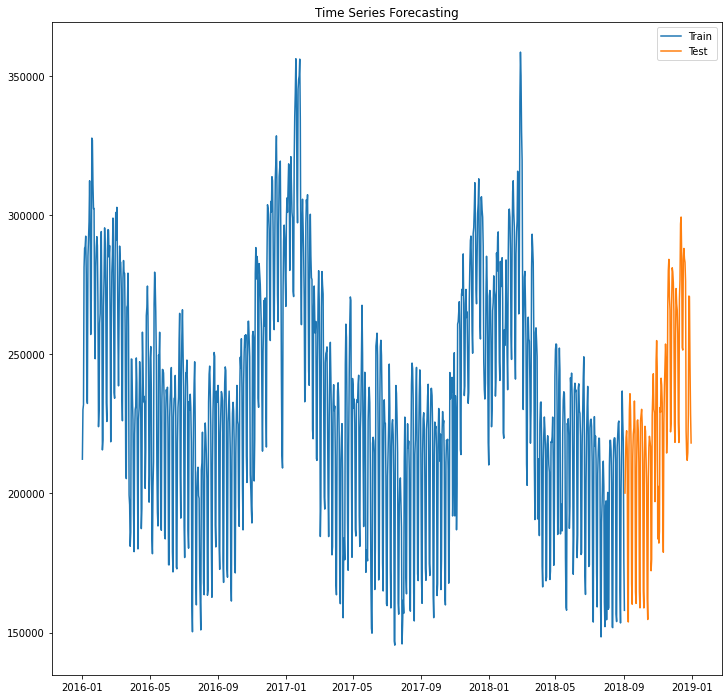

In [17]:
# Data visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.plot(train.index,train["y"],label="Train")
plt.plot(test.index,test["y"],label="Test")
plt.title("Time Series Forecasting")
plt.legend()

In [3]:
# Darts

from darts import TimeSeries
series = TimeSeries.from_dataframe(df, 'ds', 'y')

In [5]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(test))

[2021-01-18 14:19:11,820] WARNING | darts.models | Support for AutoARIMA is not available. To enable it, install u8darts[pmdarima] or u8darts[all].
[2021-01-18 14:19:11,824] WARNING | darts.models | Support Facebook Prophet is not available. To enable it, install u8darts[fbprophet] or u8darts[all].
[2021-01-18 14:19:11,829] WARNING | darts.models | Support Torch based models not available. To enable it, install u8darts[torch] or u8darts[all].


AttributeError: 'DataFrame' object has no attribute '_assert_univariate'